# Example 001: Radar fixed target

In [1]:
import os
import pickle

parent_dir = os.path.dirname(os.getcwd())
print(parent_dir)  # Prints parent directory

os.chdir(parent_dir)
#print(os.getcwd())  # Prints current working directory

c:\Users\malth\OneDrive - Aarhus Universitet\Dokumenter\AAU-Studie\10. semester\NEW GIT\MMARS


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mmars

## Setting up the radar

In [3]:
radar_model_1 = mmars.FmcwRadar(position=np.array([[0,0]]))
radar_model_1.show_parameters()
radar_model_1.radar_to_target_measures()

[[-0.02336045  0.        ]
 [-0.01557363  0.        ]
 [-0.00778682  0.        ]]
[[-0.00292006  0.        ]
 [-0.00097335  0.        ]
 [ 0.00097335  0.        ]
 [ 0.00292006  0.        ]]
Maximum unambiguous range: 99.93 m
Maximum unambiguous IF frequency: 20.00 MHz
Maximum unambiguous velocity: 37.93 m/s
Maximum unambiguous angle: 90.00 degrees
SNR: 10 dB at 10 m


## Setting up the target

In [7]:
target_model_1 = mmars.Target(start_position=np.array([[5.001,5.001]]), start_velocity=5., T_total=15., T_frame=0.1)

target_model_1.generate_trajectory(trajectory_type="sinusoidal")

In [8]:
sim = mmars.Simulation(radar_model_1, target_model_1)

sim.run()

Running simulation with <mmars.fmcwRadar.FmcwRadar object at 0x000001AF6502DFA0> and <mmars.target.Target object at 0x000001AF7F0EEB50>


100%|██████████| 150/150 [00:10<00:00, 13.93it/s]


100%|██████████| 150/150 [00:01<00:00, 95.60it/s] 


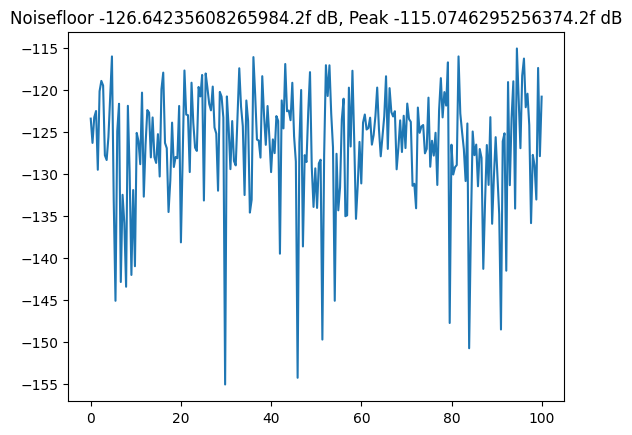

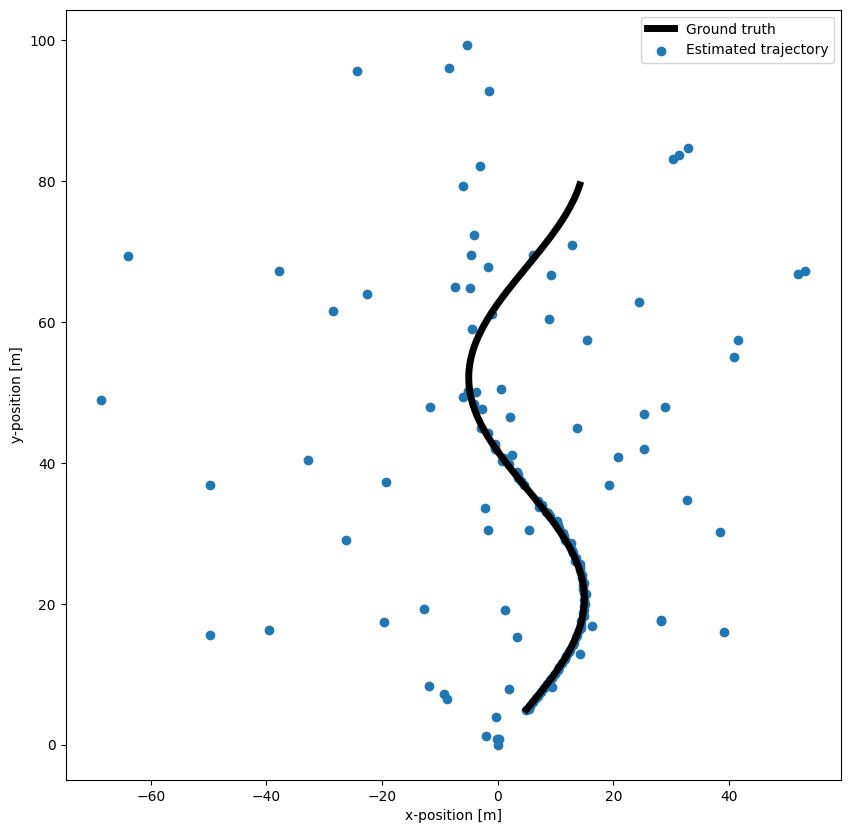

In [9]:
sim_data = sim.get_data() # Get data as: [CPI][TX][RX][CHIRP][ADC-SAMPLE]

sim.run_tracking(tracking_algorithm="maximum_value")

sim.plot()

In [12]:
file = open("sim_data_no_noise_200frames.pkl", "wb")
pickle.dump(sim_data, file)
file.close()

In [11]:
print(target_model_1.get_trajectory()[0][10])
target_model_1.get_trajectory()[1][10]

9.795255386042031


np.float64(10.001000000000001)

In [ ]:
radar_model_1.get_current_SNR()

np.float64(-26.284467174419195)

In [ ]:
radar_model_1.get_standardDeviation()